<a href="https://colab.research.google.com/github/EloyRD/ThesisExp/blob/master/Example_EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries

# Importing packages

In [0]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')

#Plotting packages
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from matplotlib import colors
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

#Data packages
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [5, 2.5]

# Defining some visualization functions

In [0]:
def plt_land(a=15, b=-80):
    #temporal data for surface triangulation
    #X_g = X
    #Y_g = Y
    #Z_g = Z
    
    X_g = X.flatten()
    Y_g = Y.flatten()
    Z_g = f(X_g,Y_g)
    
    norm = plt.Normalize(Z_g.min(), Z_g.max())
    #colors = cm.plasma(norm(Z_g))
    #rcount, ccount = colors.shape
      
    #plotting surface
    fig = plt.figure(figsize=(9, 3))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.view_init(a,b)
    # ax.plot_surface(X_g, Y_g, Z_g, cmap=cm.jet, rstride=1, cstride=1)
    # ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount, facecolors=colors)
    ax.plot_trisurf(X_g, Y_g, Z_g, cmap=cm.ocean, norm=norm, alpha=0.3, linewidth=0)
    ax.set_aspect('auto')
    ax.autoscale_view()
    ax.scatter( -1, -1, 0, color='r',s=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
        
    #plotting level curves
    levels = 15
    ay = fig.add_subplot(1,2,2)
    CS = ay.contour(X, Y, Z, levels, cmap=cm.ocean)
    ay.scatter(-1, -1, color='r')
    ay.clabel(CS, inline=True, fontsize=8)
    ay.set_aspect('auto')
  
    #adjusting
    plt.tight_layout()
    plt.show()

    
def plt_min(a=15, b=-80):
    xx = np.linspace(-1.5, -0.5, 151)
    yy = np.linspace(-1.5, -0.5, 151)
    XX, YY = np.meshgrid(xx, yy)
        
    #temporal data for surface triangulation
    X_g = XX.flatten()
    Y_g = YY.flatten()
    Z_g = f(X_g,Y_g)
    
    #plotting surface
    fig = plt.figure(figsize=(9, 3))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.view_init(a,b)
    ax.plot_trisurf(X_g, Y_g, Z_g,
                   cmap=cm.ocean, alpha=0.3, linewidth=0)
    ax.set_aspect('auto')
    ax.autoscale_view()
    ax.scatter( -1, -1, 0, s=20, color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    #adjusting
    plt.tight_layout()
    plt.show()

    
def update_par_coord():
    global xp, yp, zp
    xp = parents[:,3]
    yp = parents[:,4]
    zp = parents[:,2]

    
def update_pro_coord():
    global xr, yr, zr
    xr = progeny[:, 3]
    yr = progeny[:, 4]
    zr = progeny[:, 2]
    


In [0]:
def plt_par(gen, a=15, b=-80):
    #temporal dataframe with a generation's parents
    query = (generations['function']=='parent') & (generations['generation']==gen)
    par_g = generations[query]

    xp_g = par_g['gen_x'].values
    yp_g = par_g['gen_y'].values
    zp_g = par_g['fitness'].values

    #temporal values for surface triangulation
    X_g = X.flatten()
    Y_g = Y.flatten()
    Z_g = f(X_g,Y_g)

    #plotting surface with points
    ##fig = plt.figure(figsize=(plt.figaspect(0.5)))
    fig = plt.figure(figsize=(9, 3))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.view_init(a,b)
    ax.plot_trisurf(X_g, Y_g, Z_g,
                   cmap=cm.ocean, alpha=0.3, linewidth=0)
    ax.set_aspect('auto')
    ax.autoscale_view()
    ax.scatter(xp_g, yp_g, zp_g, color='g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ##ax.set_aspect("equal")

    #plotting level curves
    levels = 15
    ay = fig.add_subplot(1,2,2)
    ay.contour(X, Y, Z, levels, cmap=cm.ocean)
    ay.set_aspect('auto')
    ay.scatter(xp_g, yp_g, color='g')

    plt.tight_layout()

    plt.show()
    

def plt_par_3D():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(
        X, Y, Z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

    ax.autoscale(False)

    ax.scatter( xp, yp, zp, color="k", s=20)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_aspect("equal")
    plt.tight_layout()
    plt.show()

    ax.view_init(30, 30);

    
def plt_par_2Dcc():    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    levels = 15
    ax.contour(X, Y, Z, levels)
    ax.autoscale(False)
    ax.scatter(xp, yp)
    
    

In [0]:
def plt_gen(gen, a=15, b=-80):
    #temporal dataframe with a generation's parents
    query = (generations['function']=='parent') & (generations['generation']==gen)
    par_g = generations[query]

    xp_g = par_g['gen_x'].values
    yp_g = par_g['gen_y'].values
    zp_g = par_g['fitness'].values

    #temporal dataframe with a generation's progeny
    query = (generations['function']=='progeny') & (generations['generation']==gen)
    prg_g = generations[query]

    xr_g = prg_g['gen_x'].values
    yr_g = prg_g['gen_y'].values
    zr_g = prg_g['fitness'].values

    #temporal values for surface triangulation
    X_g = X.flatten()
    Y_g = Y.flatten()
    Z_g = f(X_g,Y_g)

    #plotting surface with points
    ##fig = plt.figure(figsize=(plt.figaspect(0.5)))
    fig = plt.figure(figsize=(9, 3))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.view_init(a,b)
    ax.plot_trisurf(X_g, Y_g, Z_g,
                   cmap=cm.ocean, alpha=0.3, linewidth=0)
    ax.set_aspect('auto')
    ax.autoscale_view()
    ax.scatter(xp_g, yp_g, zp_g, color='g')
    ax.scatter(xr_g, yr_g, zr_g, color='r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ##ax.set_aspect("equal")

    #plotting level curves
    levels = 15
    ay = fig.add_subplot(1,2,2)
    ay.contour(X, Y, Z, levels, cmap=cm.ocean)
    ay.set_aspect('auto')
    ay.scatter(xp_g, yp_g, color='g')
    ay.scatter(xr_g, yr_g, color='r')

    plt.tight_layout()

    plt.show()
    

def plt_gen_3D():    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(
        X, Y, Z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

    ax.autoscale(False)

    ax.scatter( xp, yp, zp, s=20)
    ax.scatter( xr, yr, zr, s=20)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_aspect("equal")
    plt.tight_layout()
    plt.show()

    ax.view_init(30, 30);

    
def plt_gen_2Dcc():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    levels = 15
    ax.contour(X, Y, Z, levels)
    ax.autoscale(False)
    ax.scatter(xp, yp)
    ax.scatter(xr, yr)
    


# Startup


## Defining Fitness Landscape

2-D  function "Happy cat" (Name because of the peculiar shape of its countour curves)
It has a minimum in (x,y) = (-1, -1) that is difficult to achieve.

In [0]:
# Function definition
def f(x, y):
    D = 2
    alpha = 1/8
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

# Sampling between the domains of the problem
x = np.linspace(-2.5, 2.5, 151)
y = np.linspace(-2.5, 2.5, 151)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [6]:
#Testing the minimum
f(-1,-1)

0.0

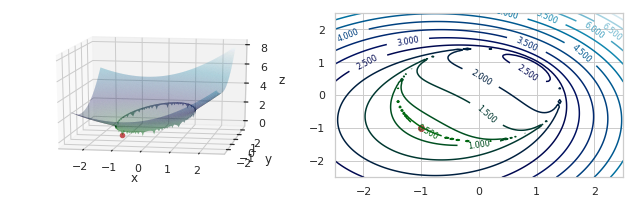

In [7]:
# Graphing the landscape
plt_land(15,-80)

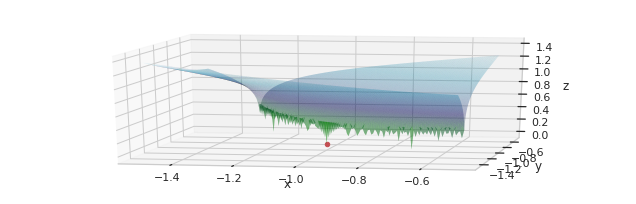

In [8]:
plt_min()

## Generating initial population randomly

In [0]:
# Let's pick ten random numbers in the problem domain (with uniform probability)
np.random.seed(654321)

#Population size
pop_s = 50

initial = np.random.uniform(-2.5000, 2.5000, (pop_s,5))

# Fitness in column 3
initial[:,2] = f(initial[:,3],initial[:,4])
# Column 0: birthdate, column 1: generation
#initial[:,0] = np.arange(10)
initial[:,0] = np.zeros(pop_s)
initial[:,1] = np.ones(pop_s)*2

In [10]:
#We'll store it as a dataframe
generation = 0
cols = ['generation','function','fitness', 'gen_x', 'gen_y' ]

generations = pd.DataFrame(initial, columns=cols)

query = (generations['generation']==generation) & (generations['function']==2)

generations.loc[query, "function"] = "parent"
generations

#We set the parents population as the 
parents = np.copy(initial)

generations

,generation,function,fitness,gen_x,gen_y
0,0.0,parent,4.135337,0.965858,1.797411
1,0.0,parent,4.969311,-2.338178,2.341816
2,0.0,parent,1.132752,-0.998618,-0.235342
3,0.0,parent,1.526142,-0.400435,0.042969
4,0.0,parent,5.252818,1.872661,1.650052
5,0.0,parent,1.457118,-1.382985,0.636565
6,0.0,parent,2.086830,0.538902,0.196349
7,0.0,parent,4.638118,2.181788,-2.300281
8,0.0,parent,2.206452,-2.068859,-2.112496
9,0.0,parent,3.157188,-0.383263,1.808036


## Visualizing

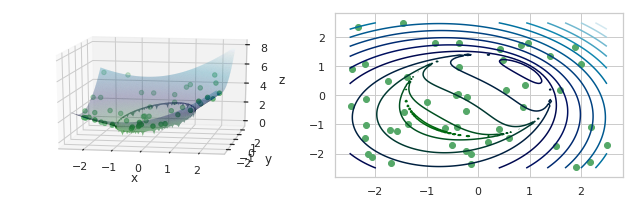

In [11]:
plt_par(generation, a=15, b=-80)

# Simple Evolutionary Algorithm

## One detailed run

### Selection of parents

In [0]:
## Select the top 5 fittest individuals of the generation
qty_prog = 25

def select_parents(qty_prog):
    global progeny
    a = np.copy(parents)
    a = a[a[:,2].argsort()]
    progeny = a
    progeny = np.delete(progeny, list(range(qty_prog,len(parents))), axis=0)    

select_parents(qty_prog)


In [13]:
progeny

array([[ 0.        ,  2.        ,  0.77868907, -0.65525957, -1.1235269 ],
       [ 0.        ,  2.        ,  0.89226701, -1.44032983, -0.57728182],
       [ 0.        ,  2.        ,  0.98316981, -1.36776711, -0.96991817],
       [ 0.        ,  2.        ,  0.98886458, -0.40782867, -1.08603734],
       [ 0.        ,  2.        ,  1.13275208, -0.99861801, -0.23534206],
       [ 0.        ,  2.        ,  1.22950711, -0.51065968, -1.71026861],
       [ 0.        ,  2.        ,  1.29070419, -1.57787221, -1.23912999],
       [ 0.        ,  2.        ,  1.32920951,  0.19499339, -1.60191544],
       [ 0.        ,  2.        ,  1.33013813,  0.40312226, -1.16643035],
       [ 0.        ,  2.        ,  1.33623395, -0.24398869, -0.52252637],
       [ 0.        ,  2.        ,  1.37704263, -1.72133322, -1.18005269],
       [ 0.        ,  2.        ,  1.45711755, -1.38298524,  0.636565  ],
       [ 0.        ,  2.        ,  1.49715962, -0.43701201,  0.01631248],
       [ 0.        ,  2.        ,  1.5

### Mutating the progeny

In [0]:
mut_p = 0.5
step_s = 1

def mut(mut_prob, s_size):
    #Mutation probability
    #Stepsize of the mutation
    global progeny
    
    #We modify the x and y values of the progeny
    a = list( [(i,j) for i in range(qty_prog) for j in range(3,5) ] )
    
    for (i,j) in a:
        r = ( np.random.random() < mut_prob)
        if r == True:
            progeny[i,j] = progeny[i,j] + (2 * (np.random.random() - 1)) * s_size
            if progeny[i,j] > 2.5:
                progeny[i,j] = 2.5
            if progeny[i,j] < -2.5:
                progeny[i,j] = -2.5

    # Fitness in column 3
    progeny[:,2] = f(progeny[:,3],progeny[:,4])

    # Column 0: generation; column 1: function
    progeny[:,0] = np.ones(qty_prog) * int(generation)
    progeny[:,1] = np.ones(qty_prog)*5

mut(mut_p, step_s)
    


In [15]:
progeny

array([[ 0.        ,  5.        ,  2.31912855, -1.69904362, -2.5       ],
       [ 0.        ,  5.        ,  1.54490402, -1.44032983, -1.7831431 ],
       [ 0.        ,  5.        ,  2.12503634, -2.5       , -1.22972543],
       [ 0.        ,  5.        ,  2.7417161 , -2.29912891, -2.5       ],
       [ 0.        ,  5.        ,  1.13275208, -0.99861801, -0.23534206],
       [ 0.        ,  5.        ,  2.78065174, -2.34373429, -2.5       ],
       [ 0.        ,  5.        ,  2.59510497, -2.5       , -2.11919935],
       [ 0.        ,  5.        ,  1.14916872, -0.14352399, -1.60191544],
       [ 0.        ,  5.        ,  1.18673777,  0.40312226, -1.42003037],
       [ 0.        ,  5.        ,  1.75839073, -2.21223145, -0.52252637],
       [ 0.        ,  5.        ,  2.71687262, -2.2700348 , -2.5       ],
       [ 0.        ,  5.        ,  1.45711755, -1.38298524,  0.636565  ],
       [ 0.        ,  5.        ,  1.18509416, -0.43701201, -0.67300739],
       [ 0.        ,  5.        ,  2.2

### Updating the dataframe

In [0]:
def df_add_prog():
    global generations
    
    prog = pd.DataFrame(progeny, columns=cols)
    generations = generations.append(prog, ignore_index = True)
    
    query = (generations['generation']==generation) & (generations['function']==5)
    generations.loc[query, "function"] = "progeny"

df_add_prog()
    


In [17]:
generations

,generation,function,fitness,gen_x,gen_y
0,0.0,parent,4.135337,0.965858,1.797411
1,0.0,parent,4.969311,-2.338178,2.341816
2,0.0,parent,1.132752,-0.998618,-0.235342
3,0.0,parent,1.526142,-0.400435,0.042969
4,0.0,parent,5.252818,1.872661,1.650052
5,0.0,parent,1.457118,-1.382985,0.636565
6,0.0,parent,2.086830,0.538902,0.196349
7,0.0,parent,4.638118,2.181788,-2.300281
8,0.0,parent,2.206452,-2.068859,-2.112496
9,0.0,parent,3.157188,-0.383263,1.808036


### Visualizing

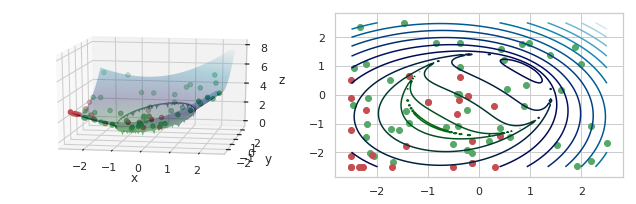

In [18]:
plt_gen(generation, a=15, b=-80)

### Selecting members of the new population

In [0]:
generation += 1

In [0]:
def new_parents():
    global parents, progeny
    parents = np.append(parents, progeny, axis=0)

    a = parents
    a = a[a[:,2].argsort()]

    parents = a
    parents = np.delete(parents, list(range(pop_s,len(parents))), axis=0)

    parents[:,2] = f(parents[:,3],parents[:,4])

    parents[:,0] = np.ones(pop_s) * int(generation)
    parents[:,1] = np.ones(pop_s)*2
    
new_parents()

In [0]:
def df_add_par():
    global generations
    par = pd.DataFrame(parents, columns=cols)
    generations = generations.append(par, ignore_index = True)
    
    query = (generations['generation']==generation) & (generations['function']==2)

    generations.loc[query, "function"] = "parent"

df_add_par()

In [22]:
with pd.option_context('display.max_rows',30):
    print(generations)

     generation function   fitness     gen_x     gen_y
0           0.0   parent  4.135337  0.965858  1.797411
1           0.0   parent  4.969311 -2.338178  2.341816
2           0.0   parent  1.132752 -0.998618 -0.235342
3           0.0   parent  1.526142 -0.400435  0.042969
4           0.0   parent  5.252818  1.872661  1.650052
5           0.0   parent  1.457118 -1.382985  0.636565
6           0.0   parent  2.086830  0.538902  0.196349
7           0.0   parent  4.638118  2.181788 -2.300281
8           0.0   parent  2.206452 -2.068859 -2.112496
9           0.0   parent  3.157188 -0.383263  1.808036
10          0.0   parent  1.290704 -1.577872 -1.239130
11          0.0   parent  1.659682 -0.134189 -2.027898
12          0.0   parent  2.863689 -2.206972  1.080333
13          0.0   parent  1.550149  0.598314 -1.475287
14          0.0   parent  1.750511 -2.189979 -1.003626
..          ...      ...       ...       ...       ...
110         1.0   parent  2.045381 -0.132981 -2.376584
111       

### Visualizing

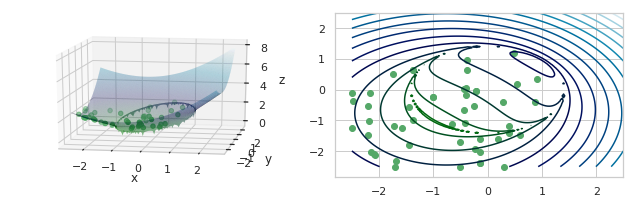

In [23]:
plt_par(generation)

#  EA for n generations

In [0]:
qty_prog = 25
mut_p = 0.5
step_s = 0.5

for i in range(57):
    select_parents(qty_prog)
    mut(mut_p, step_s)
    df_add_prog()

    generation += 1
    new_parents()
    df_add_par()

In [25]:
with pd.option_context('display.max_rows',30):
    print(generations)

      generation function   fitness     gen_x     gen_y
0            0.0   parent  4.135337  0.965858  1.797411
1            0.0   parent  4.969311 -2.338178  2.341816
2            0.0   parent  1.132752 -0.998618 -0.235342
3            0.0   parent  1.526142 -0.400435  0.042969
4            0.0   parent  5.252818  1.872661  1.650052
5            0.0   parent  1.457118 -1.382985  0.636565
6            0.0   parent  2.086830  0.538902  0.196349
7            0.0   parent  4.638118  2.181788 -2.300281
8            0.0   parent  2.206452 -2.068859 -2.112496
9            0.0   parent  3.157188 -0.383263  1.808036
10           0.0   parent  1.290704 -1.577872 -1.239130
11           0.0   parent  1.659682 -0.134189 -2.027898
12           0.0   parent  2.863689 -2.206972  1.080333
13           0.0   parent  1.550149  0.598314 -1.475287
14           0.0   parent  1.750511 -2.189979 -1.003626
...          ...      ...       ...       ...       ...
4385        58.0   parent  0.320374 -0.864383 -1

## Visualize last generation

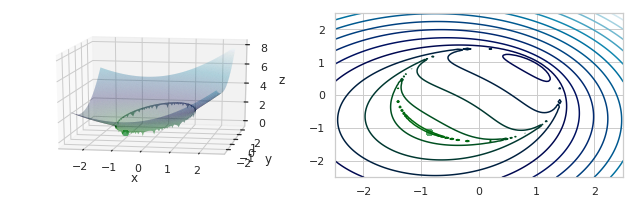

In [26]:
plt_par(generation)

# Data exploration

## Evolution of fitness

Minimum, maximum and mean fitness vs the population generation.

In [27]:
grouped = generations[generations['function']=='parent'].groupby('generation').agg({'fitness': ['min', 'max', 'mean']})
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

with pd.option_context('display.max_rows',10):
    print(grouped)

            fitness_min  fitness_max  fitness_mean
generation                                        
0.0            0.778689     5.252818      2.458673
1.0            0.778689     2.515390      1.673696
2.0            0.517177     1.783003      1.315921
3.0            0.517177     1.457118      1.160130
4.0            0.517177     1.290704      1.026461
...                 ...          ...           ...
54.0           0.320374     0.320374      0.320374
55.0           0.320374     0.320374      0.320374
56.0           0.320374     0.320374      0.320374
57.0           0.320374     0.320374      0.320374
58.0           0.320374     0.320374      0.320374

[59 rows x 3 columns]


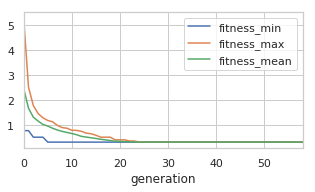

In [28]:
grouped.plot()

## Migration of Population

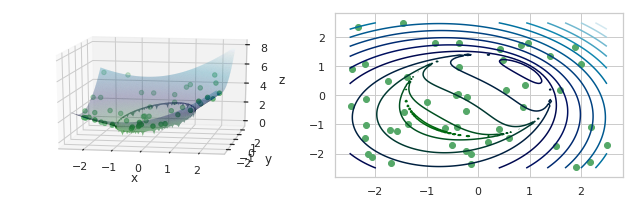

In [29]:
plt_par(0)

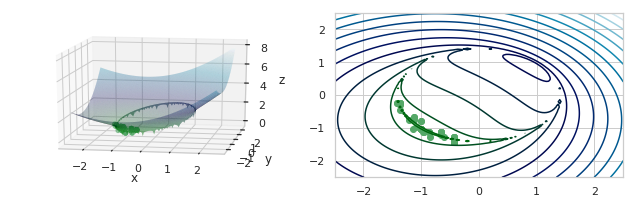

In [30]:
plt_par(10)

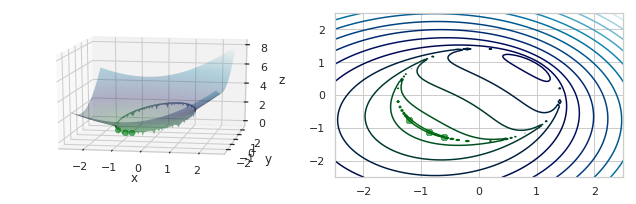

In [31]:
plt_par(20)

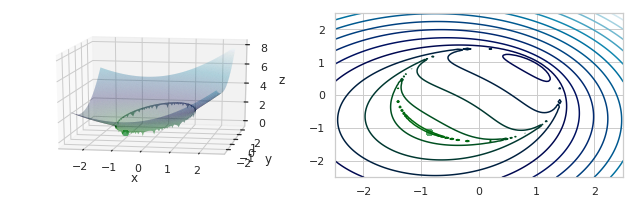

In [32]:
plt_par(30)

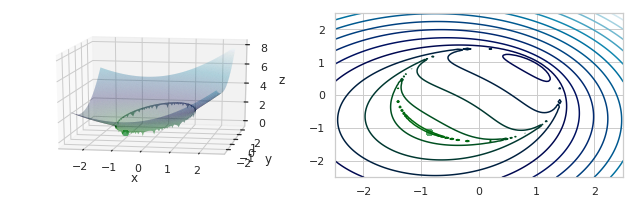

In [33]:
plt_par(40)

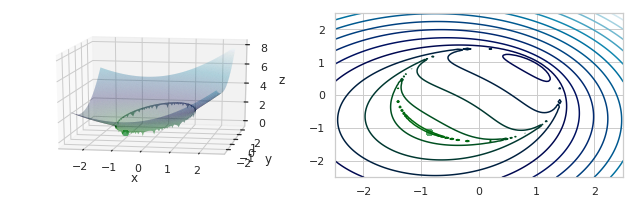

In [34]:
plt_par(50)

# Scratchpad

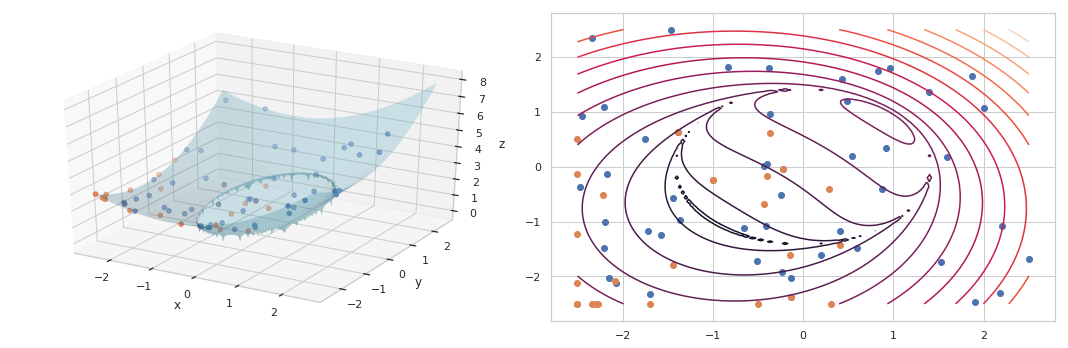

In [35]:
#ploting a specific generation
gen = 0

#temporal dataframe with a generation's parents
query = (generations['function']=='parent') & (generations['generation']==gen)
par_g = generations[query]

xp_g = par_g['gen_x'].values
yp_g = par_g['gen_y'].values
zp_g = par_g['fitness'].values

#temporal dataframe with a generation's progeny
query = (generations['function']=='progeny') & (generations['generation']==gen)
prg_g = generations[query]

xr_g = prg_g['gen_x'].values
yr_g = prg_g['gen_y'].values
zr_g = prg_g['fitness'].values

#temporal values for surface triangulation
X_g = X.flatten()
Y_g = Y.flatten()
Z_g = f(X_g,Y_g)

#plotting surface with points
##fig = plt.figure(figsize=(plt.figaspect(0.5)))
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(X_g, Y_g, Z_g,
               color='c', alpha=0.3, linewidth=0)
ax.set_aspect('auto')
#ax.autoscale(False)
ax.scatter(xp_g, yp_g, zp_g)
ax.scatter(xr_g, yr_g, zr_g)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#ax.set_aspect("equal")

#plotting level curves
ay = fig.add_subplot(1,2,2)
levels = 15
ay.contour(X, Y, Z, levels)
ay.set_aspect('auto')
#ay.autoscale(False)
ay.scatter(xp_g, yp_g)
ay.scatter(xr_g, yr_g)

plt.tight_layout()

plt.show()

In [36]:
import numpy as np
x = np.linspace(-2.5, 2.5, 151)
x

array([-2.5       , -2.46666667, -2.43333333, -2.4       , -2.36666667,
       -2.33333333, -2.3       , -2.26666667, -2.23333333, -2.2       ,
       -2.16666667, -2.13333333, -2.1       , -2.06666667, -2.03333333,
       -2.        , -1.96666667, -1.93333333, -1.9       , -1.86666667,
       -1.83333333, -1.8       , -1.76666667, -1.73333333, -1.7       ,
       -1.66666667, -1.63333333, -1.6       , -1.56666667, -1.53333333,
       -1.5       , -1.46666667, -1.43333333, -1.4       , -1.36666667,
       -1.33333333, -1.3       , -1.26666667, -1.23333333, -1.2       ,
       -1.16666667, -1.13333333, -1.1       , -1.06666667, -1.03333333,
       -1.        , -0.96666667, -0.93333333, -0.9       , -0.86666667,
       -0.83333333, -0.8       , -0.76666667, -0.73333333, -0.7       ,
       -0.66666667, -0.63333333, -0.6       , -0.56666667, -0.53333333,
       -0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
       -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2 

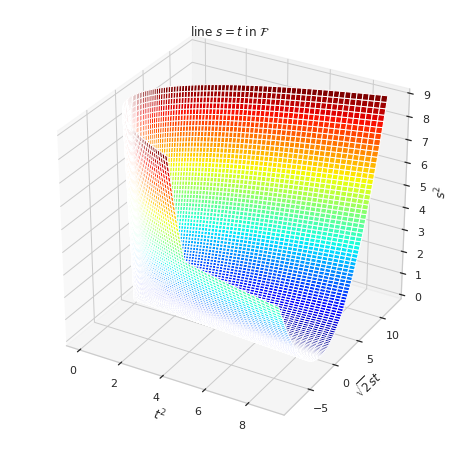

In [37]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

t = np.linspace(-3, 2, 121)
s = np.linspace(-3, 2, 121)

T, S = np.meshgrid(t, s)

ax.plot_surface(T * T, (2 ** (1/2)) * T * S, S * S, cmap=cm.jet, rstride=1, cstride=1)

ax.set_xlabel('$t^2$')
ax.set_ylabel('$\sqrt{2} s t$')
ax.set_zlabel('$s^2$')

ax.set_title('line $s = t$ in $\cal F$')

plt.show()

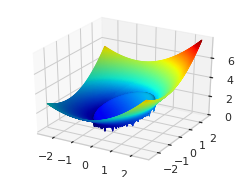

In [38]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(1, 2, 1, projection='3d')

norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))
rcount, ccount, _ = colors.shape

#ax.view_init(a,b)
ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,
               facecolors=colors)

#ax.set_aspect('auto')
#ax.autoscale_view()
#ax.scatter( -1, -1, 0, color='r',s=20)
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')